In [16]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
import pickle

plt.rcParams["figure.figsize"] = (15, 10)

In [51]:
infile = open ('higgs_250_500.pkl','rb')
higgs_data = pickle.load(infile)
infile = open ('qcd_250_500.pkl', 'rb')
qcd_data = pickle.load(infile)

In [52]:
higgs_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [53]:
qcd_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [79]:
for i in range(10):
 print(higgs_data['mass'][i],new_dict1['d2'][i])

125.15036485403486 1.2980200835589373
130.55267214662751 1.445626317832899
125.70306309880351 0.986596849742669
126.21585336608149 1.2184665392866647
132.18250371689544 1.2917844364435773
125.67653506886116 0.4343656746345235
127.65400794990293 0.9312049446719695
124.16656852260293 0.9493560863407668
122.13035265114684 3.0022665455324082
125.19144633816678 0.5539996032675585


In [80]:
for i in range(10):
 print(qcd_data['mass'][i],new_dict2['d2'][i])

125.29872026896659 3.304886302915122
88.0470543065784 2.4390891450626166
85.79417445424248 4.118371457491606
42.94732814665354 8.038338215316234
59.54222652643443 6.353842223846714
52.25202892050295 35.22466496007628
87.72005721179889 3.8934825497044394
59.648628855244354 8.789222507192793
74.23631116158323 3.2765540773471997
41.90450338556174 26.87568501726949


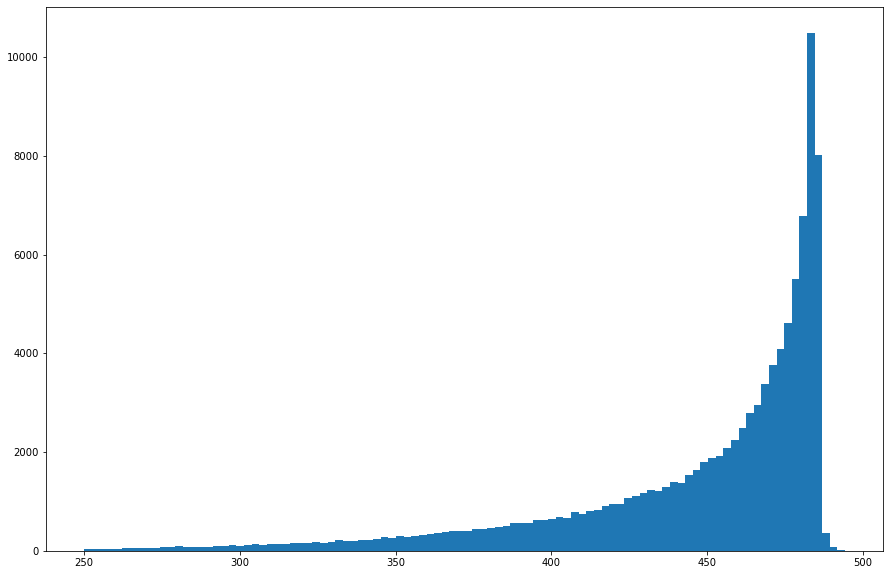

In [62]:
y = higgs_data['pt']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

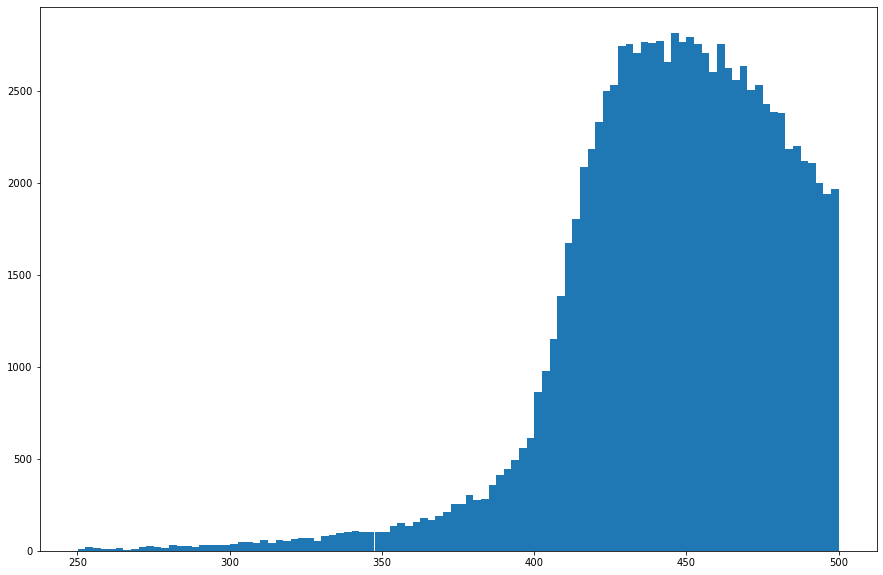

In [63]:
y = qcd_data['pt']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

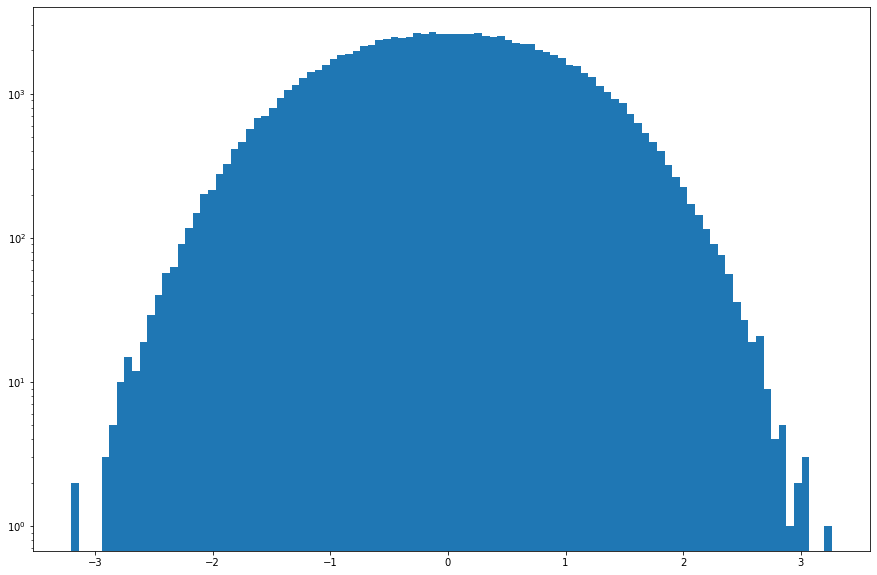

In [66]:
y = higgs_data['eta']
plt.hist(y, 100)
plt.yscale('log')
plt.show()

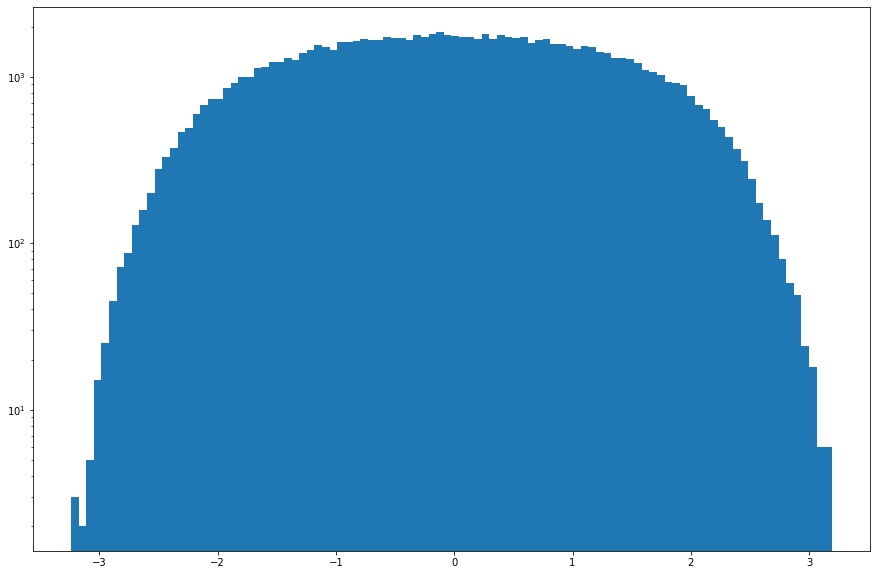

In [67]:
y = qcd_data['eta']
plt.hist(y, 100)
plt.yscale('log')
plt.show()

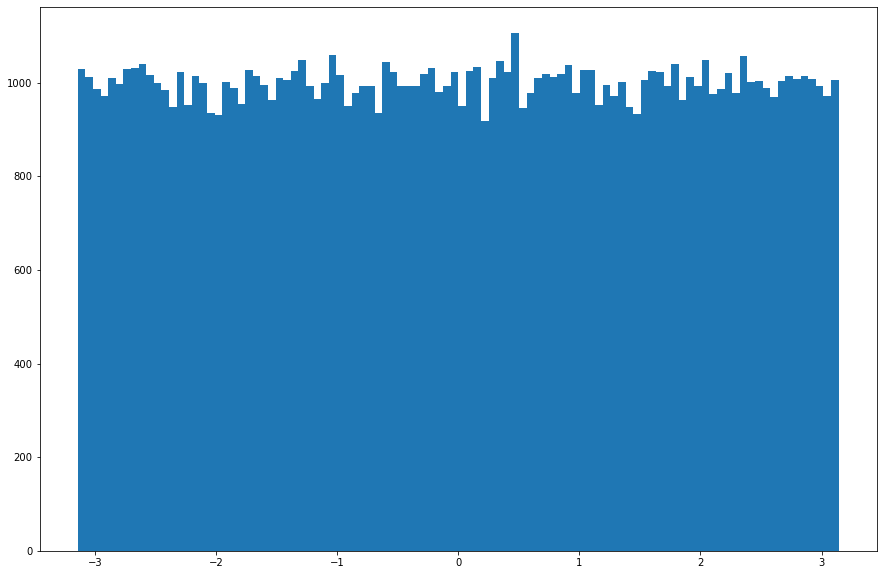

In [68]:
y = higgs_data['phi']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

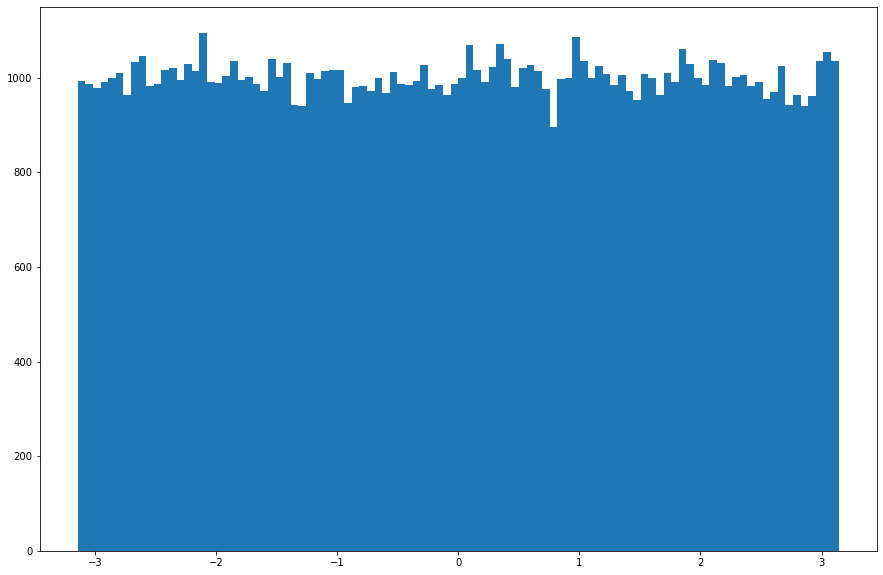

In [72]:
y = qcd_data['phi']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

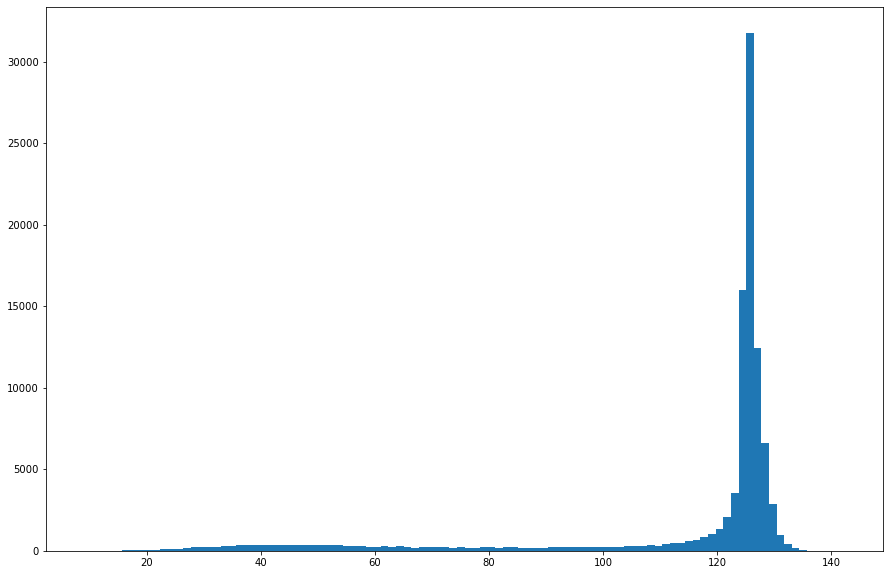

In [70]:
y = higgs_data['mass']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

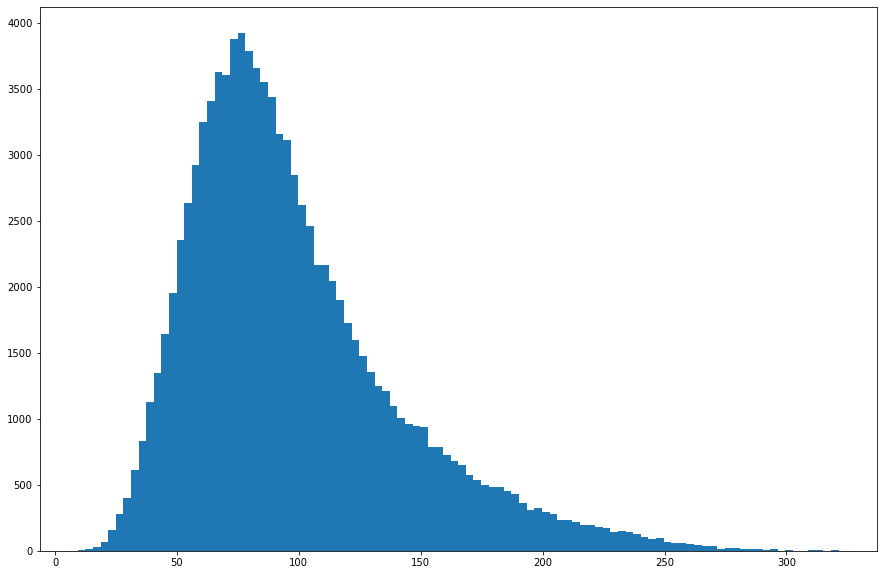

In [71]:
y = qcd_data['mass']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

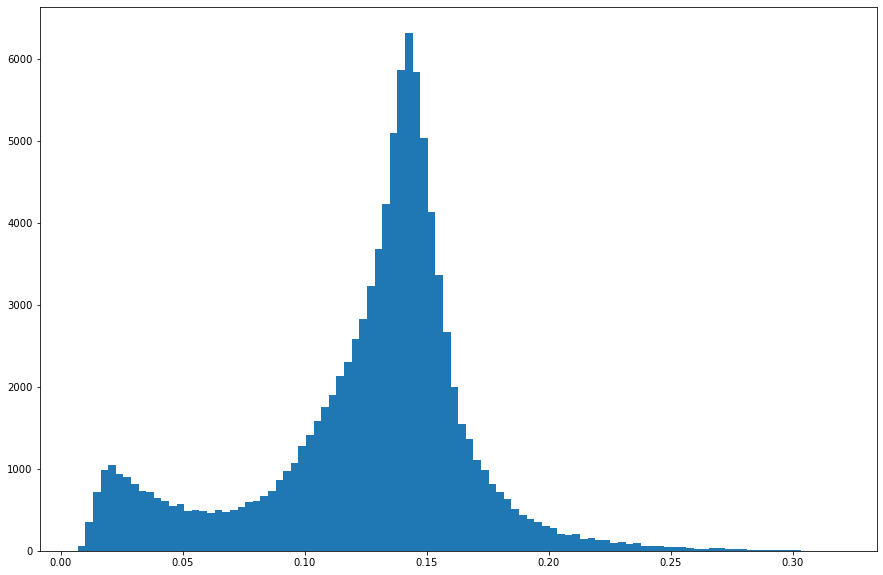

In [73]:
y = higgs_data['ee2']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

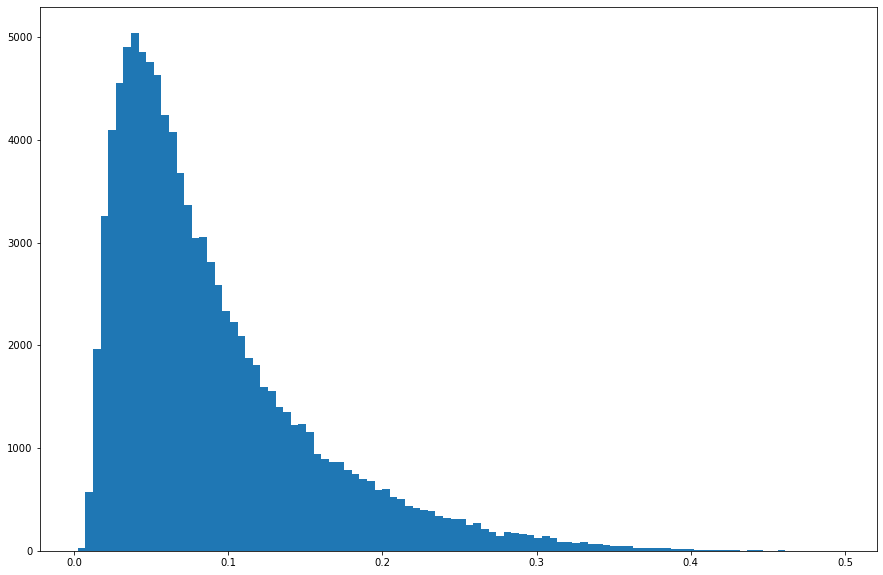

In [74]:
y = qcd_data['ee2']
plt.hist(y, 100)
# plt.yscale('log')
plt.show()

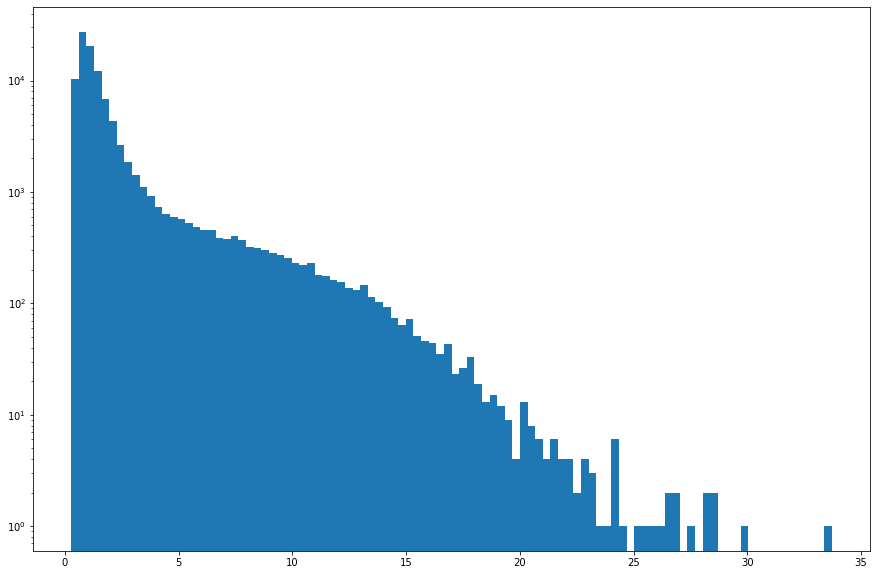

In [78]:
y = higgs_data['d2']
plt.hist(y, 100)
plt.yscale('log')
plt.show()

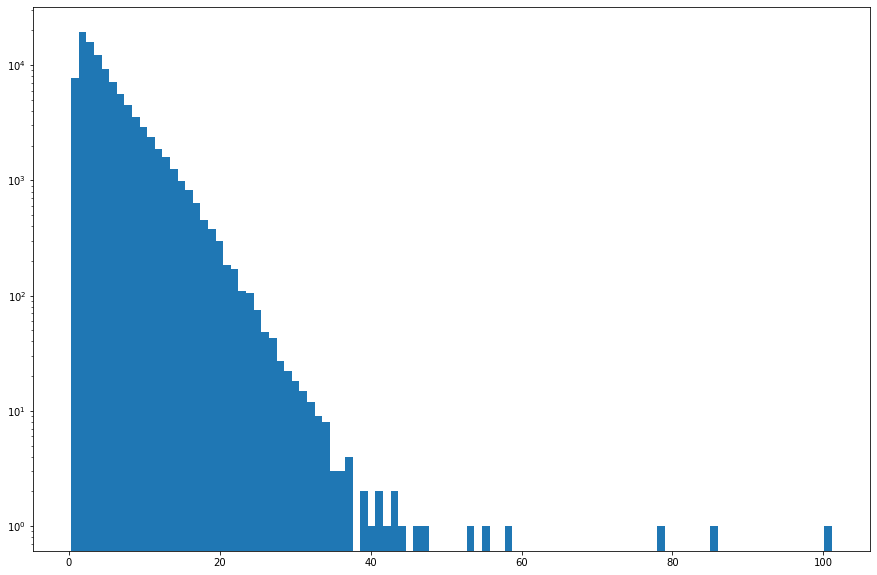

In [77]:
y = qcd_data['d2']
plt.hist(y, 100)
plt.yscale('log')
plt.show()

'pt' refers to the component of momentum transverse (perpendicular) to the beam line. ?High pt events correspond to hard collisions between partons (quarks)? 

$\eta$ ('eta') is the psuedorapidity, and it is a function of polar angle $\theta$ that goes from  $\inf$  to  -$\inf$  as  $\theta$ goes from 0 to $\pi$.

Azimuthal angle $\phi$ ('phi') goes around the beam.